In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dosya_yolu='/workspaces/HR_Analiz_project/hr_dataset.csv'
df =pd.read_csv(dosya_yolu)

In [4]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Position,Years_at_Company,Salary,Education_Level,Performance_Score,...,Remote_Work,Sick_Days_in_Last_Year,Promotion_Last_5_Years,Left_Company,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Favorite_Color,Hobby,Estimated_Annual_Bonus
0,1,Hüseyin,57.0,Male,Sales,Senior,38,NaN,Master,3,...,True,0,True,False,2,4,9,Green,Gaming,NaN
1,2,Fatma,NaN,Male,Marketing,Manager,8,54234.0,PhD,3,...,False,10,True,True,5,7,0,Yellow,Traveling,5193.274541
2,3,Ali,49.0,Male,Marketing,Intern,17,NaN,Bachelor,4,...,False,8,True,True,6,8,5,White,Music,NaN
3,4,Hüseyin,36.0,Male,IT,Junior,35,126284.0,PhD,3,...,True,6,True,True,3,9,3,Black,Sports,9139.923382
4,5,Mehmet,23.0,Male,Finance,Senior,39,52322.0,Master,1,...,False,13,False,False,2,5,7,Red,Traveling,2963.943736


# veri setini keşfe edelim

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Name                     10000 non-null  object 
 2   Age                      9500 non-null   float64
 3   Gender                   10000 non-null  object 
 4   Department               9700 non-null   object 
 5   Position                 10000 non-null  object 
 6   Years_at_Company         10000 non-null  int64  
 7   Salary                   9000 non-null   float64
 8   Education_Level          10000 non-null  object 
 9   Performance_Score        10000 non-null  int64  
 10  Marital_Status           10000 non-null  object 
 11  Has_Children             10000 non-null  bool   
 12  Working_Hours_per_Week   10000 non-null  int64  
 13  Remote_Work              10000 non-null  bool   
 14  Sick_Days_in_Last_Year 

# açıklayıcı istatiksel bilgilere bakıyoruz

açıklayıcı istatiksel bilgiler numeric ve object tipindeki datalarda farklı bilgiler verir. Bunun için veri setindeki sütunları object ve numeric olarak ayıralım.

In [6]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus'],
      dtype='object')

In [7]:
numeric_sutunlar =[
    sutun
    for sutun in df.columns
    if df[sutun].dtype in ["int64", "float64"]
    ]

df[numeric_sutunlar]

,Employee_ID,Age,Years_at_Company,Salary,Performance_Score,Working_Hours_per_Week,Sick_Days_in_Last_Year,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Estimated_Annual_Bonus
0,1,57.0,38,NaN,3,31,0,2,4,9,NaN
1,2,NaN,8,54234.0,3,45,10,5,7,0,5193.274541
2,3,49.0,17,NaN,4,47,8,6,8,5,NaN
3,4,36.0,35,126284.0,3,47,6,3,9,3,9139.923382
4,5,23.0,39,52322.0,1,42,13,2,5,7,2963.943736
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,63.0,8,123268.0,3,53,6,1,3,8,17189.899795
9996,9997,41.0,4,110551.0,3,53,2,4,4,7,9860.980842
9997,9998,46.0,3,118467.0,1,59,4,2,3,6,11478.411883
9998,9999,21.0,8,121164.0,1,57,2,9,9,1,6298.654648


In [8]:
object_sutunlar =[
    sutun
    for sutun in df.columns
    if df[sutun].dtype == "O"
    ]

df[object_sutunlar]

,Name,Gender,Department,Position,Education_Level,Marital_Status,Favorite_Color,Hobby
0,Hüseyin,Male,Sales,Senior,Master,Divorced,Green,Gaming
1,Fatma,Male,Marketing,Manager,PhD,Single,Yellow,Traveling
2,Ali,Male,Marketing,Intern,Bachelor,Single,White,Music
3,Hüseyin,Male,IT,Junior,PhD,Married,Black,Sports
4,Mehmet,Male,Finance,Senior,Master,Married,Red,Traveling
...,...,...,...,...,...,...,...,...
9995,Fatma,Female,Finance,Senior,High School,Married,White,Sports
9996,Mehmet,Female,Operations,Junior,PhD,Married,Green,Gaming
9997,Emine,Female,Operations,Intern,Master,Single,Red,Reading
9998,Emine,Female,HR,Senior,Master,Single,Green,Music


In [9]:
df[numeric_sutunlar].describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Age,9500.0,40.862737,13.433499,18.000000,30.000000,41.000000,53.000000,64.000000
Years_at_Company,10000.0,19.502500,11.588478,0.000000,9.000000,20.000000,29.000000,39.000000
Salary,9000.0,89832.444778,34580.446485,30002.000000,59597.000000,89414.500000,119852.000000,149952.000000
Performance_Score,10000.0,2.508400,1.126080,1.000000,1.000000,2.500000,4.000000,4.000000
Working_Hours_per_Week,10000.0,39.669800,11.617360,20.000000,30.000000,40.000000,50.000000,59.000000
Sick_Days_in_Last_Year,10000.0,7.074900,4.313554,0.000000,3.000000,7.000000,11.000000,14.000000
Work_Life_Balance_Score,10000.0,4.987400,2.587800,1.000000,3.000000,5.000000,7.000000,9.000000
Job_Satisfaction_Score,10000.0,4.983400,2.587275,1.000000,3.000000,5.000000,7.000000,9.000000
Previous_Employer_Count,10000.0,4.471400,2.887424,0.000000,2.000000,4.000000,7.000000,9.000000


In [10]:
df[object_sutunlar].describe().T

,count,unique,top,freq
Name,10000,8,Ali,1271
Gender,10000,2,Female,5032
Department,9700,6,Sales,1737
Position,10000,5,Senior,2020
Education_Level,10000,4,Bachelor,2535
Marital_Status,10000,3,Married,3354
Favorite_Color,10000,6,White,1701
Hobby,10000,5,Traveling,2121


# Eksik verilere bakalım

In [11]:
df.isnull().sum()

Employee_ID                   0
Name                          0
Age                         500
Gender                        0
Department                  300
Position                      0
Years_at_Company              0
Salary                     1000
Education_Level               0
Performance_Score             0
Marital_Status                0
Has_Children                  0
Working_Hours_per_Week        0
Remote_Work                   0
Sick_Days_in_Last_Year        0
Promotion_Last_5_Years        0
Left_Company                  0
Work_Life_Balance_Score       0
Job_Satisfaction_Score        0
Previous_Employer_Count       0
Favorite_Color                0
Hobby                         0
Estimated_Annual_Bonus     1000
dtype: int64

In [12]:
eksik_veri_orani = pd.isnull(df).mean() #yüzdesel olarak eksik veri oranları
eksik_veri_orani

Employee_ID                0.00
Name                       0.00
Age                        0.05
Gender                     0.00
Department                 0.03
Position                   0.00
Years_at_Company           0.00
Salary                     0.10
Education_Level            0.00
Performance_Score          0.00
Marital_Status             0.00
Has_Children               0.00
Working_Hours_per_Week     0.00
Remote_Work                0.00
Sick_Days_in_Last_Year     0.00
Promotion_Last_5_Years     0.00
Left_Company               0.00
Work_Life_Balance_Score    0.00
Job_Satisfaction_Score     0.00
Previous_Employer_Count    0.00
Favorite_Color             0.00
Hobby                      0.00
Estimated_Annual_Bonus     0.10
dtype: float64

In [13]:
doldurulacak_eksik_veriler = eksik_veri_orani[(eksik_veri_orani < 0.5)& (eksik_veri_orani >0.00)].index  
doldurulacak_eksik_veriler

Index(['Age', 'Department', 'Salary', 'Estimated_Annual_Bonus'], dtype='object')

In [14]:
#Sayısal eksik verileri doldurma
def eksik_veri_doldurma(sutun_adi:str):
     return df[sutun_adi].fillna(df[sutun_adi].mean(), inplace=True)

eksik_veri_doldurma('Age')
eksik_veri_doldurma('Salary')
eksik_veri_doldurma('Estimated_Annual_Bonus')

/tmp/ipykernel_45482/458805908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  return df[sutun_adi].fillna(df[sutun_adi].mean(), inplace=True)


In [15]:
# object sütunun eksik verisini doldurma 

df['Department'].fillna(df['Department'].mode()[0], inplace= True)

/tmp/ipykernel_45482/1437966855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0], inplace= True)


In [16]:
df.isnull().sum()

Employee_ID                0
Name                       0
Age                        0
Gender                     0
Department                 0
Position                   0
Years_at_Company           0
Salary                     0
Education_Level            0
Performance_Score          0
Marital_Status             0
Has_Children               0
Working_Hours_per_Week     0
Remote_Work                0
Sick_Days_in_Last_Year     0
Promotion_Last_5_Years     0
Left_Company               0
Work_Life_Balance_Score    0
Job_Satisfaction_Score     0
Previous_Employer_Count    0
Favorite_Color             0
Hobby                      0
Estimated_Annual_Bonus     0
dtype: int64

# Özellik mühendisliği -- Feature Engineering

var olan sütunların değerlerini inceleyerek yeni sütunları üretmektir.
yeni sütunlar üretmek için maddeler:
* oluşturulan yeni sütunun veri setinde ilişkili olması beklenir.
* oluşturulan yeni sütunun eski sütundan daha iyi anlaliz edilebilmesi lazım.
* oluşturulan yeni sütunun eski sütundan daha zengin anlam çıkarması beklenir.

Eğer sayılabilen bir sayısal veri var ise bu veriyi belli aralıklar içerisinde yeni bir sütun olarak oluşturursak, daha anlamlı bir bilgi çıkarabiliriz.

In [17]:
df['Age'].value_counts().sort_index()

Age
18.000000    192
19.000000    201
20.000000    195
21.000000    202
22.000000    196
23.000000    197
24.000000    191
25.000000    202
26.000000    208
27.000000    212
28.000000    171
29.000000    192
30.000000    232
31.000000    202
32.000000    226
33.000000    228
34.000000    232
35.000000    217
36.000000    205
37.000000    197
38.000000    210
39.000000    208
40.000000    216
40.862737    500
41.000000    206
42.000000    186
43.000000    219
44.000000    199
45.000000    213
46.000000    205
47.000000    193
48.000000    206
49.000000    187
50.000000    199
51.000000    185
52.000000    182
53.000000    198
54.000000    204
55.000000    200
56.000000    227
57.000000    181
58.000000    195
59.000000    211
60.000000    179
61.000000    226
62.000000    200
63.000000    177
64.000000    190
Name: count, dtype: int64

In [18]:
df['yas_gruplari'] = pd.cut(df['Age'], [18,25,35,45,55,65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
df['yas_gruplari']

0       56-65
1       36-45
2       46-55
3       36-45
4       18-25
        ...  
9995    56-65
9996    36-45
9997    46-55
9998    18-25
9999    46-55
Name: yas_gruplari, Length: 10000, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65']

# 2. Özellik Mühendisliği

çalışanın aylık maaşı ile şirkette kaç yıl çalıştığının oranını alırsak bu çalışanın hakkında daha fazla bilgiye erişebiliriz.

In [19]:
df['yillik_maas']=(df['Salary'] / df['Years_at_Company'])
df['yillik_maas']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: yillik_maas, Length: 10000, dtype: float64

In [20]:
df['Position'].unique()

array(['Senior', 'Manager', 'Intern', 'Junior', 'Team Lead'], dtype=object)

# 3. Özellik mühendisliği 

var olan veri çeşidi içerisinde sadece ihtiyaç duyulan kısıtlı bilgiye erişim sağlanmak istenirse veri mühendisliği kullanılması gerekir. 
Position içerisinden sadece Senior olanları almak için veri mühendisliği yapalım.

In [21]:
df['senyor_mu']= np.where(df['Position'].isin(['Manager', 'Team Lead', 'Senior']),1,0) #eğer seinor'da bunlar varsa 1 yaz yoksa 0 yaz.
df['senyor_mu']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: senyor_mu, Length: 10000, dtype: int64

# 4. Özellik Mühendisliği

2'den çok sütunlar arasında sorular sorarak ve soruların cevapları olarak ilişki kurma yöntemine ağaçlandırma modeli denir. bu şekilde çok kapsamlı bir mühendislikle yeni sütunlar oluşturulabilir. 

In [22]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married'], dtype=object)

In [23]:
df['Has_Children'].value_counts()

Has_Children
True     5007
False    4993
Name: count, dtype: int64

In [24]:
df['aile_durumu']= np.where((df['Marital_Status']== 'Married') &(df['Has_Children']), 'evli ve çocuk sahibi', 'diğerleri')
df['aile_durumu'].value_counts()

aile_durumu
diğerleri               8289
evli ve çocuk sahibi    1711
Name: count, dtype: int64

# 5. Özellik Mühendisliği

hastalık bahanesiyle uzaktan çalışanlara bakalım. dolandırıcılık (freud) analiz için kullanılır.

In [25]:
df['Remote_Work'] #uzaktan çalışıyorsa True çalışmıyorsa False verir.

0        True
1       False
2       False
3        True
4       False
        ...  
9995    False
9996     True
9997    False
9998     True
9999     True
Name: Remote_Work, Length: 10000, dtype: bool

# uzakta çalışanların hasta oldukları günlerin oranlarına bakalım

In [26]:
#eğer çalışan uzaktan çalışıyorsa uzaktan çalışma/hastalık günlerinin oranlarına bakıp, çalışma verimliliğini buluyoruz.
df['uzaktan_calisanlarin_hastalik_orani']= np.where(df['Remote_Work'], (df['Sick_Days_in_Last_Year']/ df['Working_Hours_per_Week']+1), 0)# hasta olduğu süre ile çalıştığı süreye bölüp oranı buluyoruz.
df[['Name', 'Sick_Days_in_Last_Year', 'Working_Hours_per_Week','uzaktan_calisanlarin_hastalik_orani']]

,Name,Sick_Days_in_Last_Year,Working_Hours_per_Week,uzaktan_calisanlarin_hastalik_orani
0,Hüseyin,0,31,1.000000
1,Fatma,10,45,0.000000
2,Ali,8,47,0.000000
3,Hüseyin,6,47,1.127660
4,Mehmet,13,42,0.000000
...,...,...,...,...
9995,Fatma,6,53,0.000000
9996,Mehmet,2,53,1.037736
9997,Emine,4,59,0.000000
9998,Emine,2,57,1.035088


# açıklama
az gün hasta olan 1.3 gösterdi.
çok gün hasta olan 1.5 gösterdi. 

10 gün hasta olan 40 saat çalışanın oranı 1.25
10 gün hasta olan 30 saat çalışanın oranı 1.33

1'den sonra değer ne kadar fazla yükselirse çalışanın hastalık bahanesiyle uzaktan çalışma ihtimali doğru orantılı bir şekilde artıyor.

# 6. Özellik Mühendisliği


cinsiyetler göre bir gruplama yapılıp ve hangi cinsiyetin 'uzaktan_calisanlarin_hastalik_orani'  ortalamasını alarak cinsiyetin tembellik ile ilgili bir ilişkisi var mı? yorumlayacağız.

In [27]:
tembellik_orani= df.groupby('Gender')['uzaktan_calisanlarin_hastalik_orani'].mean()
print(tembellik_orani)

Gender
Female    0.604254
Male      0.597908
Name: uzaktan_calisanlarin_hastalik_orani, dtype: float64


# korelasyon: sütunlar arasında ilişkiye bakma durumu 

kolerasyon sütunların birbiriyle olan ilişkilerini gösterin, eğer aralarında doğru orantılı bir ilişki varsa burada kolerasyon katsayısı yüksektir ve sıcak renkler gözükür.
ters orantı var kolerasyon katsayısı düşüktür ve soğuk renkler gözükür.

**kolerayon kullanma senaryoları**

Özellik Mühendisliğinden sonra yeni oluşturulan sütunlar diğer sütunlarla ilişkisini inceledikten sonra özellik mühendisliğinin kalitesi ölçülür.

verileri kapsamlı bir şekilde incelemek için bütün sütunlar arasındaki ilişkilere bakılır.

<Axes: >

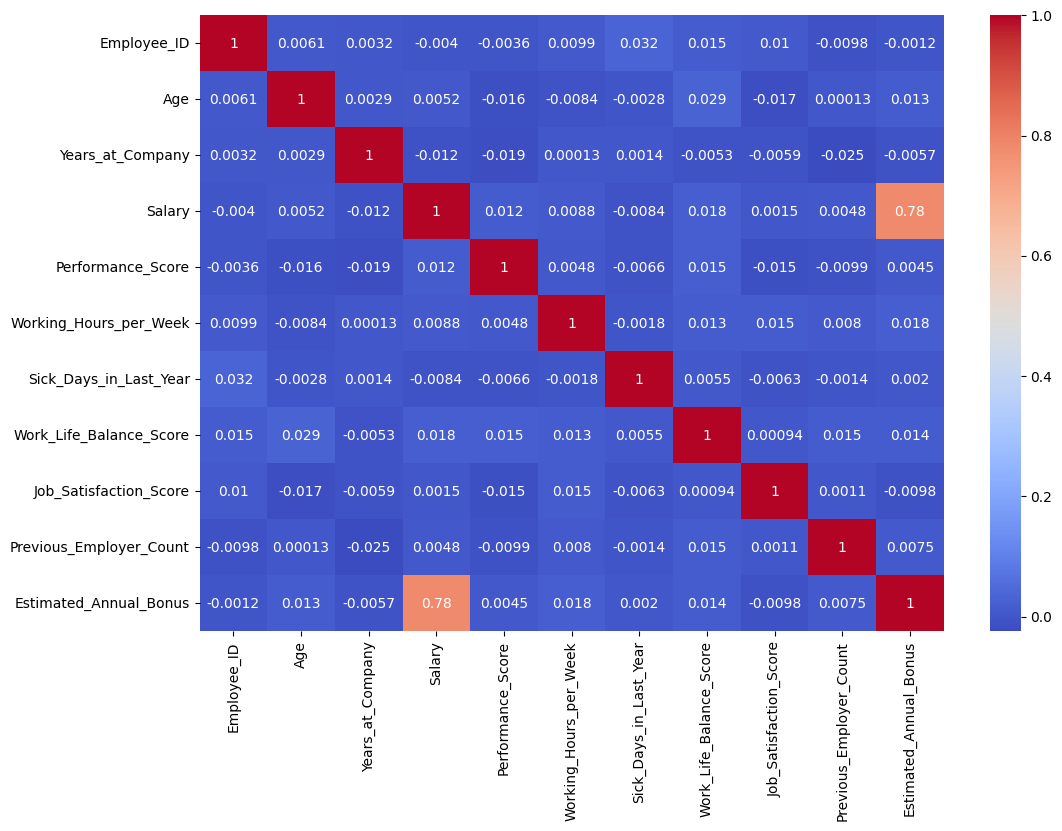

In [28]:
#korelasyon matrisi 
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_sutunlar].corr(), annot=True, cmap='coolwarm')  

# yaş aralıklarını görselleştirme

In [29]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus', 'yas_gruplari', 'yillik_maas', 'senyor_mu',
       'aile_durumu', 'uzaktan_calisanlarin_hastalik_orani'],
      dtype='object')

Text(0, 0.5, 'frekanslar')

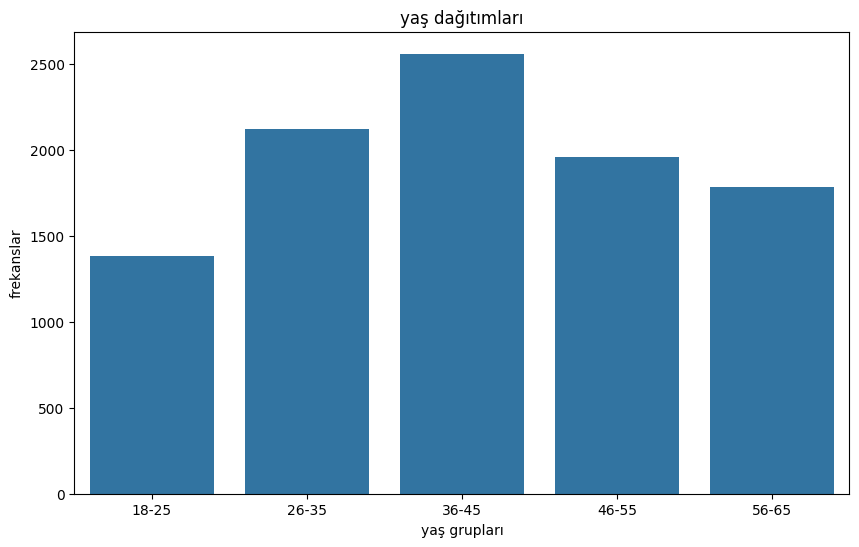

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x= 'yas_gruplari', order=["18-25", "26-35", "36-45", "46-55","56-65"])
plt.title('yaş dağıtımları')
plt.xlabel('yaş grupları')
plt.ylabel('frekanslar')

şirkete 18-25 yaş arası genç çalışanları almak şirketin vizyonu doğrutlusunda doğru bir sonuç olacak. Bunun için şirketten 500-600 kişi 56-65 yaş arasındaki kişileri emekli edebiliriz. 

# şirket çalışanlarının şirkete olan bağlılık seviyesinin dağılımına bakalım.


In [31]:
df['Aidiyetlik_Miktarı'] = (df['Salary'] / df['Years_at_Company'])
df['Aidiyetlik_Miktarı']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: Aidiyetlik_Miktarı, Length: 10000, dtype: float64

In [32]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus', 'yas_gruplari', 'yillik_maas', 'senyor_mu',
       'aile_durumu', 'uzaktan_calisanlarin_hastalik_orani',
       'Aidiyetlik_Miktarı'],
      dtype='object')

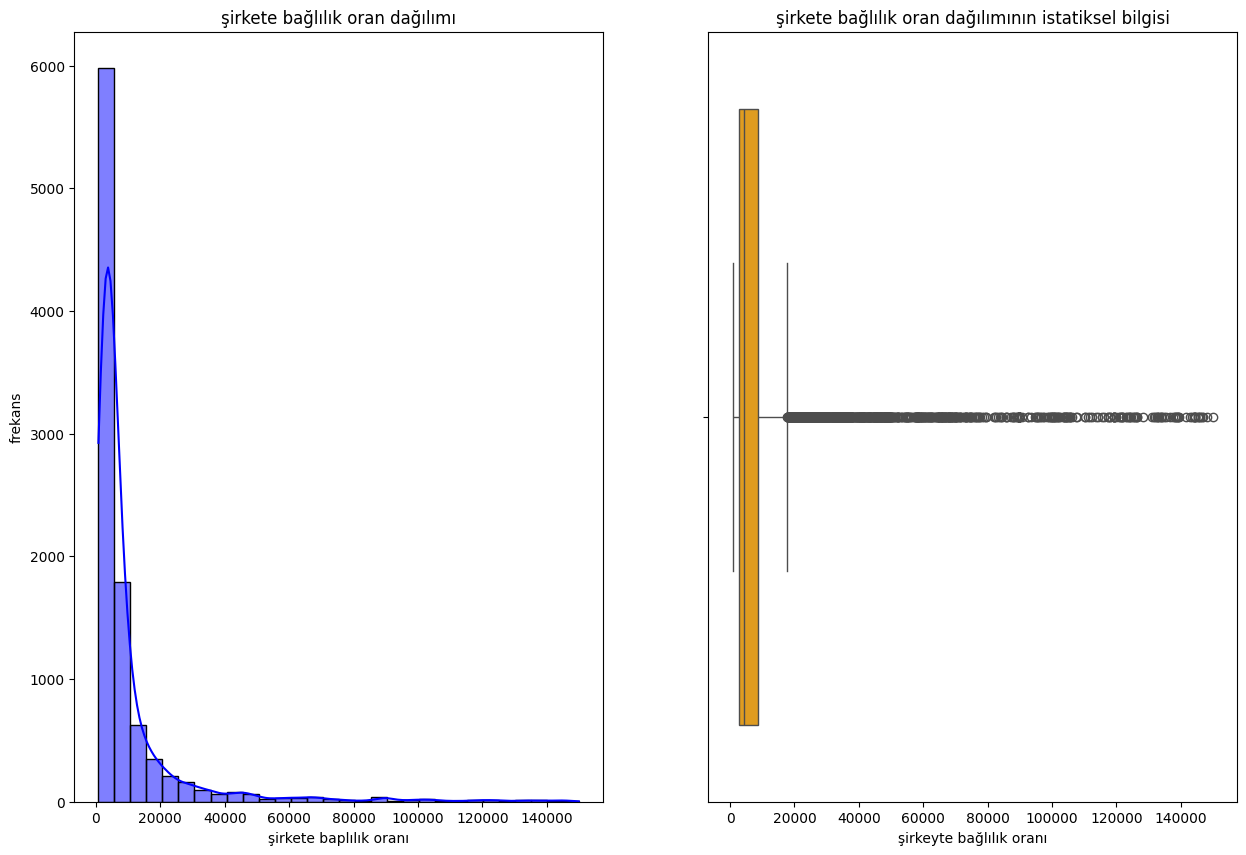

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(df['Aidiyetlik_Miktarı'], kde=True, bins=30, color='blue')
plt.title('şirkete bağlılık oran dağılımı')
plt.xlabel('şirkete baplılık oranı')
plt.ylabel('frekans')

#1.satırın 2.sütun grafiğini ekledik
plt.subplot(1,2,2)
sns.boxplot(x=df['Aidiyetlik_Miktarı'], color='Orange')
plt.title('şirkete bağlılık oran dağılımının istatiksel bilgisi')
plt.xlabel('şirkeyte bağlılık oranı')
plt.show()

50000 kazanıyorum 25 yıl boyunca çalıştım aidiyetlik oranım 2000
30000 kazanıyorum 25 yıl boyunca çalıştım aidiyetlik oranım 1200

60000 kazanıyorum 15 yıl boyunca çalıştım aidiyetlik oranım 4000 
60000 kazanıyorum 5 yıl boyunca çalıştım aidiyetlik oranım 12000

**kurumda kendini aidiyetlik yoksunu hisseden kişiler için toplantılar yapılıp var olan sorunların çözülmesi için tavsiye verebiliriz.**


# şirketteki uzman kişilerin yüzdesini görüntüleme.

In [39]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus', 'yas_gruplari', 'yillik_maas', 'senyor_mu',
       'aile_durumu', 'uzaktan_calisanlarin_hastalik_orani',
       'Aidiyetlik_Miktarı'],
      dtype='object')

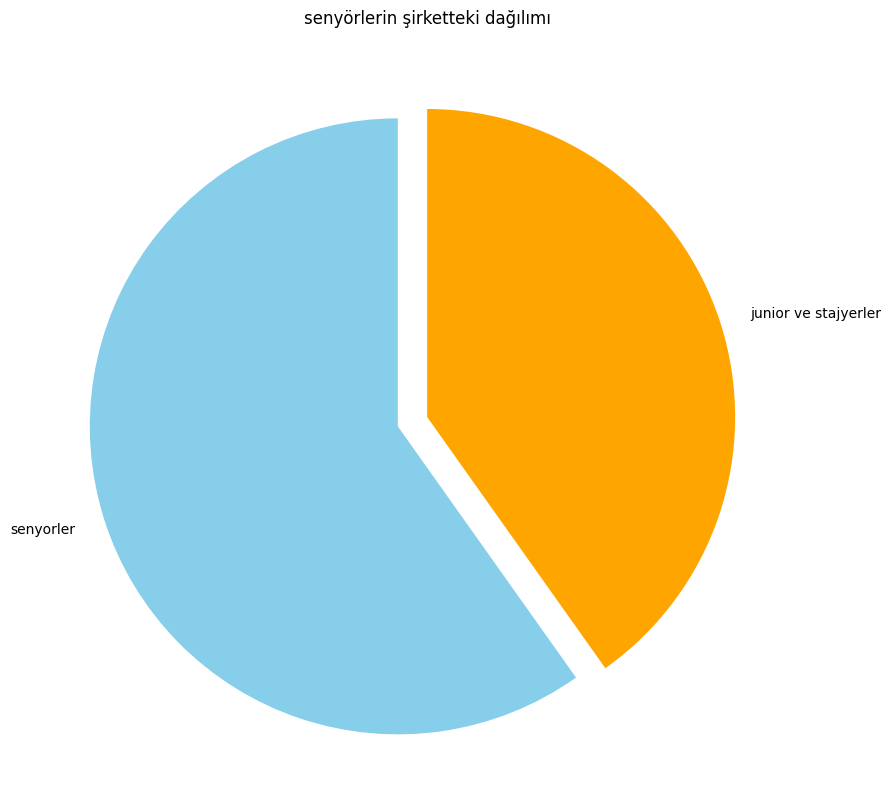

In [56]:
senyor_sayisi=df['senyor_mu'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(
    senyor_sayisi,
    labels =['senyorler', 'junior ve stajyerler'],
    colors=['skyblue','Orange'],
    startangle=90,
    explode=[0.1,0],
)
plt.title('senyörlerin şirketteki dağılımı')
plt.show()

şirkette yaşlı kişi sayısı çok olduğundan ve bu kişiler senior ve aidiyeti düşük insanlar olduğundan bu kişilerin %40'nı kadar emekli edip bunların yerlerine junior ve stajyerlerden alıp aidiyeti yüksek senior kişilerin altında yetişmelerini sağlamak, yeni startuplar için bir oluşum yapılmasını tavsiye ederiz.